In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r India_2021

In [5]:
India_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
48,48,YS Chahal (INDIA),2,-,-,-,-,-,-,-,...,102,5,3/50,20.40,5.10,24.0,0,0,0,0
49,49,DL Chahar (INDIA),2,1,1,69,69*,-,82,84.14,...,90,4,2/37,22.50,6.00,22.5,0,0,1,0
50,50,RD Chahar (INDIA),1,1,0,13,13,13.00,25,52.00,...,54,3,3/54,18.00,5.40,20.0,0,0,0,0
73,73,S Dhawan (INDIA),6,6,1,297,98,59.40,323,91.95,...,-,-,-,-,-,-,-,-,4,0
94,94,K Gowtham (INDIA),1,1,0,2,2,2.00,3,66.66,...,49,1,1/49,49.00,6.12,48.0,0,0,1,0
121,121,Ishan Kishan (INDIA),2,2,0,60,59,30.00,46,130.43,...,-,-,-,-,-,-,-,-,2,0
122,122,SS Iyer (INDIA),1,1,0,6,6,6.00,9,66.66,...,-,-,-,-,-,-,-,-,0,0
141,141,V Kohli (INDIA),3,3,0,129,66,43.00,149,86.57,...,-,-,-,-,-,-,-,-,3,0
143,143,Kuldeep Yadav (INDIA),4,-,-,-,-,-,-,-,...,255,2,2/48,127.50,6.71,114.0,0,0,1,0
144,144,B Kumar (INDIA),5,2,1,22,19*,22.00,33,66.66,...,252,9,3/42,28.00,5.25,32.0,0,0,2,0


In [6]:
India_2021=India_2021.reset_index()

In [7]:
India_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,48,48,YS Chahal (INDIA),2,-,-,-,-,-,-,...,102,5,3/50,20.40,5.10,24.0,0,0,0,0
1,49,49,DL Chahar (INDIA),2,1,1,69,69*,-,82,...,90,4,2/37,22.50,6.00,22.5,0,0,1,0
2,50,50,RD Chahar (INDIA),1,1,0,13,13,13.00,25,...,54,3,3/54,18.00,5.40,20.0,0,0,0,0
3,73,73,S Dhawan (INDIA),6,6,1,297,98,59.40,323,...,-,-,-,-,-,-,-,-,4,0
4,94,94,K Gowtham (INDIA),1,1,0,2,2,2.00,3,...,49,1,1/49,49.00,6.12,48.0,0,0,1,0
5,121,121,Ishan Kishan (INDIA),2,2,0,60,59,30.00,46,...,-,-,-,-,-,-,-,-,2,0
6,122,122,SS Iyer (INDIA),1,1,0,6,6,6.00,9,...,-,-,-,-,-,-,-,-,0,0
7,141,141,V Kohli (INDIA),3,3,0,129,66,43.00,149,...,-,-,-,-,-,-,-,-,3,0
8,143,143,Kuldeep Yadav (INDIA),4,-,-,-,-,-,-,...,255,2,2/48,127.50,6.71,114.0,0,0,1,0
9,144,144,B Kumar (INDIA),5,2,1,22,19*,22.00,33,...,252,9,3/42,28.00,5.25,32.0,0,0,2,0


In [8]:
India_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
India_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,YS Chahal (INDIA),2,-,-,-,-,-,-,-,-,...,102,5,3/50,20.40,5.10,24.0,0,0,0,0
1,DL Chahar (INDIA),2,1,1,69,69*,-,82,84.14,0,...,90,4,2/37,22.50,6.00,22.5,0,0,1,0
2,RD Chahar (INDIA),1,1,0,13,13,13.00,25,52.00,0,...,54,3,3/54,18.00,5.40,20.0,0,0,0,0
3,S Dhawan (INDIA),6,6,1,297,98,59.40,323,91.95,0,...,-,-,-,-,-,-,-,-,4,0
4,K Gowtham (INDIA),1,1,0,2,2,2.00,3,66.66,0,...,49,1,1/49,49.00,6.12,48.0,0,0,1,0
5,Ishan Kishan (INDIA),2,2,0,60,59,30.00,46,130.43,0,...,-,-,-,-,-,-,-,-,2,0
6,SS Iyer (INDIA),1,1,0,6,6,6.00,9,66.66,0,...,-,-,-,-,-,-,-,-,0,0
7,V Kohli (INDIA),3,3,0,129,66,43.00,149,86.57,0,...,-,-,-,-,-,-,-,-,3,0
8,Kuldeep Yadav (INDIA),4,-,-,-,-,-,-,-,-,...,255,2,2/48,127.50,6.71,114.0,0,0,1,0
9,B Kumar (INDIA),5,2,1,22,19*,22.00,33,66.66,0,...,252,9,3/42,28.00,5.25,32.0,0,0,2,0


In [10]:
India_2021_players =India_2021.copy()

In [11]:
India_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
India_2021_players.HS=India_2021_players.HS.str.extract('(\d+)')
India_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
India_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,2,-,-,-,0,-,-,-,-,-,...,102,5,3/50,20.40,5.10,24.0,0,0,0,0
1,2,1,1,69,69,-,82,84.14,0,1,...,90,4,2/37,22.50,6.00,22.5,0,0,1,0
2,1,1,0,13,13,13.00,25,52.00,0,0,...,54,3,3/54,18.00,5.40,20.0,0,0,0,0
3,6,6,1,297,98,59.40,323,91.95,0,3,...,-,-,-,-,-,-,-,-,4,0
4,1,1,0,2,2,2.00,3,66.66,0,0,...,49,1,1/49,49.00,6.12,48.0,0,0,1,0
5,2,2,0,60,59,30.00,46,130.43,0,1,...,-,-,-,-,-,-,-,-,2,0
6,1,1,0,6,6,6.00,9,66.66,0,0,...,-,-,-,-,-,-,-,-,0,0
7,3,3,0,129,66,43.00,149,86.57,0,2,...,-,-,-,-,-,-,-,-,3,0
8,4,-,-,-,0,-,-,-,-,-,...,255,2,2/48,127.50,6.71,114.0,0,0,1,0
9,5,2,1,22,19,22.00,33,66.66,0,0,...,252,9,3/42,28.00,5.25,32.0,0,0,2,0


In [14]:
India_2021_players.replace("-",0,inplace=True)

In [15]:
India_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

India_2021_players_scaled = pd.DataFrame(scaler.fit_transform(India_2021_players),columns=India_2021_players.columns)
India_2021_players_scaled.shape
India_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.413947,-1.401607,-0.707107,-0.919200,-1.138015,-1.043501,-0.916816,-1.603169,-0.204124,-0.645179,...,2.0,0.429400,1.294716,-0.091425,0.632341,0.032833,-0.294884,0.0,-1.028992,-0.204124
1,-0.413947,-0.714545,1.060660,0.030273,1.009771,-1.043501,0.211997,0.187408,-0.204124,0.595550,...,2.0,0.286900,0.895112,-0.032146,0.936027,-0.012267,-0.294884,0.0,-0.171499,-0.204124
2,-1.060739,-0.714545,-0.707107,-0.740314,-0.733360,-0.544666,-0.572666,-0.496561,-0.204124,-0.645179,...,-0.5,-0.140600,0.495509,-0.159172,0.733570,-0.087435,-0.294884,0.0,-1.028992,-0.204124
3,2.173221,2.720766,1.060660,3.167663,1.912464,1.235791,3.529605,0.353612,-0.204124,3.077008,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,2.400980,-0.204124
4,-1.060739,-0.714545,-0.707107,-0.891679,-1.075761,-0.966758,-0.875518,-0.184582,-0.204124,-0.645179,...,-0.5,-0.199975,-0.303699,0.715896,0.976518,0.754445,-0.294884,0.0,-0.171499,-0.204124


In [17]:
India_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.0,25.000000,2.500000e+01
mean,-3.774758e-17,-8.881784e-18,-7.105427e-17,2.220446e-17,-9.325873e-17,-4.440892e-17,3.774758e-17,-1.065814e-16,-4.662937e-17,-2.220446e-17,...,0.000000,-6.217249e-17,-1.332268e-17,-4.440892e-17,-9.769963e-17,-3.552714e-17,-6.661338e-17,0.0,0.000000,-2.886580e-17
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,...,1.020621,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,0.0,1.020621,1.020621e+00
min,-1.060739e+00,-1.401607e+00,-7.071068e-01,-9.192003e-01,-1.138015e+00,-1.043501e+00,-9.168163e-01,-1.603169e+00,-2.041241e-01,-6.451792e-01,...,-0.500000,-7.818499e-01,-7.033027e-01,-6.672757e-01,-1.088545e+00,-6.887781e-01,-2.948839e-01,0.0,-1.028992,-2.041241e-01
25%,-1.060739e+00,-7.145446e-01,-7.071068e-01,-8.366374e-01,-9.512514e-01,-9.667576e-01,-7.929222e-01,-5.391226e-01,-2.041241e-01,-6.451792e-01,...,-0.500000,-7.818499e-01,-7.033027e-01,-6.672757e-01,-1.088545e+00,-6.887781e-01,-2.948839e-01,0.0,-1.028992,-2.041241e-01
50%,2.328452e-01,-2.748249e-02,-7.071068e-01,-2.862181e-01,1.369603e-02,-1.302497e-01,-2.835798e-01,1.874084e-01,-2.041241e-01,-6.451792e-01,...,-0.500000,-4.612249e-01,-7.033027e-01,-6.672757e-01,3.455269e-01,-6.887781e-01,-2.948839e-01,0.0,-0.171499,-2.041241e-01
75%,2.328452e-01,6.595797e-01,1.060660e+00,7.182972e-01,6.984974e-01,6.064913e-01,4.735508e-01,5.581222e-01,-2.041241e-01,5.955500e-01,...,-0.500000,4.293999e-01,9.590491e-02,1.231079e-01,9.360270e-01,6.590717e-02,-2.948839e-01,0.0,0.685994,-2.041241e-01
max,2.173221e+00,2.720766e+00,2.828427e+00,3.167663e+00,2.223737e+00,2.352414e+00,3.529605e+00,1.630681e+00,4.898979e+00,3.077008e+00,...,2.000000,2.246275e+00,2.893131e+00,2.931793e+00,1.374684e+00,2.738876e+00,3.391165e+00,0.0,2.400980,4.898979e+00


In [18]:
X =  India_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.41394695, -1.40160676, -0.70710678, -0.9192003 , -1.13801545,
        -1.0435014 , -0.9168163 , -1.60316921, -0.20412415, -0.64517917,
        -0.29488391, -0.78476691, -0.56563336, -1.67632146, -0.41394695,
         0.38874362,  0.64661442,  2.        ,  0.42939995,  1.29471628,
        -0.09142481,  0.63234124,  0.03283332, -0.29488391,  0.        ,
        -1.02899151, -0.20412415],
       [-0.41394695, -0.71454462,  1.06066017,  0.03027306,  1.00977082,
        -1.0435014 ,  0.21199656,  0.1874084 , -0.20412415,  0.59555   ,
        -0.29488391,  0.0425476 , -0.20304787, -1.66521999, -0.41394695,
         0.38874362,  0.28833959,  2.        ,  0.28689997,  0.89511249,
        -0.03214603,  0.936027  , -0.01226739, -0.29488391,  0.        ,
        -0.17149859, -0.20412415],
       [-1.06073905, -0.71454462, -0.70710678, -0.74031401, -0.73336007,
        -0.54466641, -0.57266604, -0.49656075, -0.20412415, -0.64517917,
        -0.29488391, -0.78476691, -0.56563336, -1.6541

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(India_2021_players_scaled))

False

In [23]:
India_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.413947,-1.401607,-0.707107,-0.919200,-1.138015,-1.043501,-0.916816,-1.603169,-0.204124,-0.645179,...,2.0,0.429400,1.294716,-0.091425,0.632341,0.032833,-0.294884,0.0,-1.028992,-0.204124
1,-0.413947,-0.714545,1.060660,0.030273,1.009771,-1.043501,0.211997,0.187408,-0.204124,0.595550,...,2.0,0.286900,0.895112,-0.032146,0.936027,-0.012267,-0.294884,0.0,-0.171499,-0.204124
2,-1.060739,-0.714545,-0.707107,-0.740314,-0.733360,-0.544666,-0.572666,-0.496561,-0.204124,-0.645179,...,-0.5,-0.140600,0.495509,-0.159172,0.733570,-0.087435,-0.294884,0.0,-1.028992,-0.204124
3,2.173221,2.720766,1.060660,3.167663,1.912464,1.235791,3.529605,0.353612,-0.204124,3.077008,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,2.400980,-0.204124
4,-1.060739,-0.714545,-0.707107,-0.891679,-1.075761,-0.966758,-0.875518,-0.184582,-0.204124,-0.645179,...,-0.5,-0.199975,-0.303699,0.715896,0.976518,0.754445,-0.294884,0.0,-0.171499,-0.204124
5,-0.413947,-0.027482,-0.707107,-0.093571,0.698497,0.107656,-0.283580,1.172503,-0.204124,0.595550,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,0.685994,-0.204124
6,-1.060739,-0.714545,-0.707107,-0.836637,-0.951251,-0.813270,-0.792922,-0.184582,-0.204124,-0.645179,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,-1.028992,-0.204124
7,0.232845,0.659580,-0.707107,0.855902,0.916389,0.606491,1.134319,0.239121,-0.204124,1.836279,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,1.543487,-0.204124
8,0.879637,-1.401607,-0.707107,-0.919200,-1.138015,-1.043501,-0.916816,-1.603169,-0.204124,-0.645179,...,2.0,2.246275,0.095905,2.931793,1.175601,2.738876,-0.294884,0.0,-0.171499,-0.204124
9,1.526429,-0.027482,1.060660,-0.616470,-0.546596,-0.199319,-0.462538,-0.184582,-0.204124,-0.645179,...,-0.5,2.210650,2.893131,0.123108,0.682956,0.273370,-0.294884,0.0,0.685994,-0.204124


In [24]:
np.all(np.isfinite(India_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


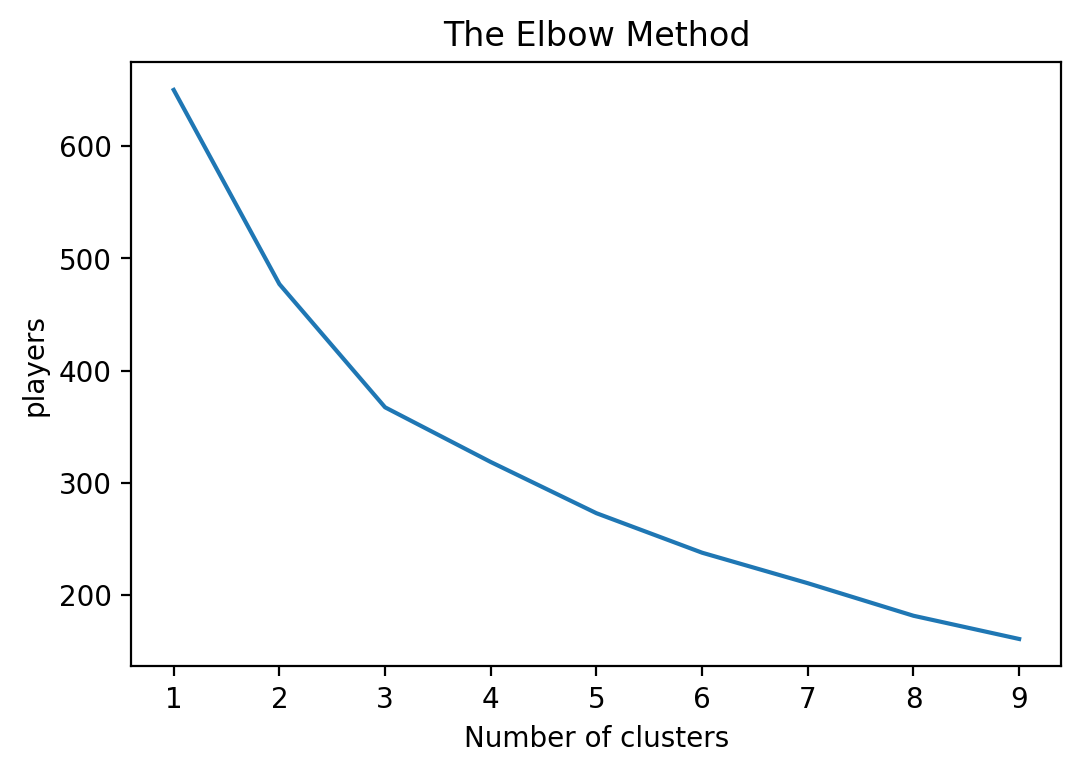

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1,
       1, 2, 1])

In [28]:
kmeans.cluster_centers_

array([[-0.93138063, -0.78325084, -0.1767767 , -0.70178466, -0.64620352,
        -0.70199129, -0.61809387, -0.62424634, -0.20412415, -0.52110625,
        -0.29488391, -0.63112279, -0.49311627, -0.37189913, -0.93138063,
        -0.21866829, -0.22041068,  0.        , -0.26053747, -0.06393661,
        -0.10299828,  0.35902406, -0.09194532, -0.29488391,  0.        ,
        -0.68599434,  0.30618622],
       [ 0.30471095,  0.73591989, -0.11785113,  0.9323492 ,  0.88526147,
         0.87535052,  0.8788833 ,  0.71070651,  0.36288737,  0.7334088 ,
        -0.29488391,  0.92239003,  0.40126128,  0.25039975,  0.30471095,
        -0.8260802 , -0.78648492, -0.5       , -0.78184991, -0.70330267,
        -0.66727575, -1.08854474, -0.68877807, -0.29488391,  0.        ,
         0.78127133, -0.20412415],
       [ 1.09523463,  0.20153823,  0.47140452, -0.22888271, -0.25088634,
        -0.14304029, -0.28816849, -0.0256492 , -0.20412415, -0.23160278,
         0.93379906, -0.33171373,  0.21996853,  0.2442

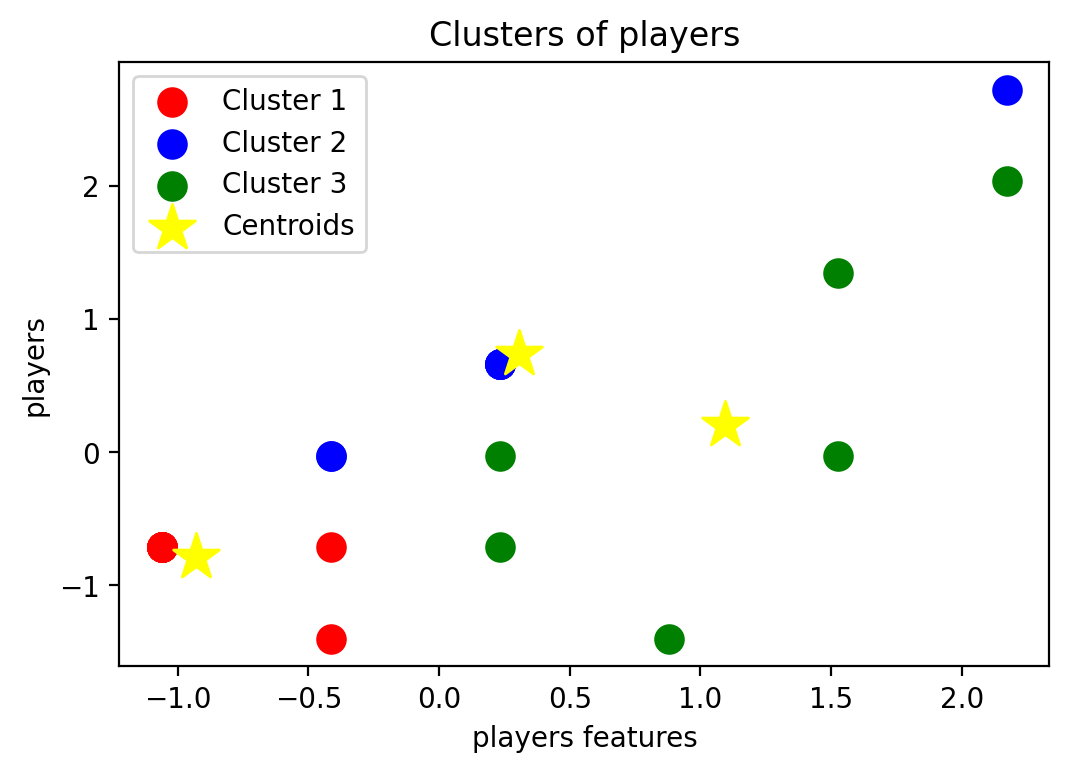

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
India_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,YS Chahal (INDIA),2,-,-,-,-,-,-,-,-,...,102,5,3/50,20.40,5.10,24.0,0,0,0,0
1,DL Chahar (INDIA),2,1,1,69,69*,-,82,84.14,0,...,90,4,2/37,22.50,6.00,22.5,0,0,1,0
2,RD Chahar (INDIA),1,1,0,13,13,13.00,25,52.00,0,...,54,3,3/54,18.00,5.40,20.0,0,0,0,0
3,S Dhawan (INDIA),6,6,1,297,98,59.40,323,91.95,0,...,-,-,-,-,-,-,-,-,4,0
4,K Gowtham (INDIA),1,1,0,2,2,2.00,3,66.66,0,...,49,1,1/49,49.00,6.12,48.0,0,0,1,0
5,Ishan Kishan (INDIA),2,2,0,60,59,30.00,46,130.43,0,...,-,-,-,-,-,-,-,-,2,0
6,SS Iyer (INDIA),1,1,0,6,6,6.00,9,66.66,0,...,-,-,-,-,-,-,-,-,0,0
7,V Kohli (INDIA),3,3,0,129,66,43.00,149,86.57,0,...,-,-,-,-,-,-,-,-,3,0
8,Kuldeep Yadav (INDIA),4,-,-,-,-,-,-,-,-,...,255,2,2/48,127.50,6.71,114.0,0,0,1,0
9,B Kumar (INDIA),5,2,1,22,19*,22.00,33,66.66,0,...,252,9,3/42,28.00,5.25,32.0,0,0,2,0


In [31]:
India_2021["cluster"] = y_kmeans

In [32]:
India_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,YS Chahal (INDIA),2,-,-,-,-,-,-,-,-,...,5,3/50,20.40,5.10,24.0,0,0,0,0,0
1,DL Chahar (INDIA),2,1,1,69,69*,-,82,84.14,0,...,4,2/37,22.50,6.00,22.5,0,0,1,0,0
2,RD Chahar (INDIA),1,1,0,13,13,13.00,25,52.00,0,...,3,3/54,18.00,5.40,20.0,0,0,0,0,0
3,S Dhawan (INDIA),6,6,1,297,98,59.40,323,91.95,0,...,-,-,-,-,-,-,-,4,0,1
4,K Gowtham (INDIA),1,1,0,2,2,2.00,3,66.66,0,...,1,1/49,49.00,6.12,48.0,0,0,1,0,0
5,Ishan Kishan (INDIA),2,2,0,60,59,30.00,46,130.43,0,...,-,-,-,-,-,-,-,2,0,1
6,SS Iyer (INDIA),1,1,0,6,6,6.00,9,66.66,0,...,-,-,-,-,-,-,-,0,0,0
7,V Kohli (INDIA),3,3,0,129,66,43.00,149,86.57,0,...,-,-,-,-,-,-,-,3,0,1
8,Kuldeep Yadav (INDIA),4,-,-,-,-,-,-,-,-,...,2,2/48,127.50,6.71,114.0,0,0,1,0,2
9,B Kumar (INDIA),5,2,1,22,19*,22.00,33,66.66,0,...,9,3/42,28.00,5.25,32.0,0,0,2,0,2


In [33]:
India_2021['cluster'].value_counts()

0    10
1     9
2     6
Name: cluster, dtype: int64

In [34]:
India_Cluster_2021 = np.array([10,9,6])

In [35]:
India_Cluster_2021

array([10,  9,  6])

In [36]:
%store India_Cluster_2021

Stored 'India_Cluster_2021' (ndarray)


In [37]:
India_2021_players_scaled.insert(0, 'Player', India_2021.Player)

In [38]:
India_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,YS Chahal (INDIA),-0.413947,-1.401607,-0.707107,-0.919200,-1.138015,-1.043501,-0.916816,-1.603169,-0.204124,...,2.0,0.429400,1.294716,-0.091425,0.632341,0.032833,-0.294884,0.0,-1.028992,-0.204124
1,DL Chahar (INDIA),-0.413947,-0.714545,1.060660,0.030273,1.009771,-1.043501,0.211997,0.187408,-0.204124,...,2.0,0.286900,0.895112,-0.032146,0.936027,-0.012267,-0.294884,0.0,-0.171499,-0.204124
2,RD Chahar (INDIA),-1.060739,-0.714545,-0.707107,-0.740314,-0.733360,-0.544666,-0.572666,-0.496561,-0.204124,...,-0.5,-0.140600,0.495509,-0.159172,0.733570,-0.087435,-0.294884,0.0,-1.028992,-0.204124
3,S Dhawan (INDIA),2.173221,2.720766,1.060660,3.167663,1.912464,1.235791,3.529605,0.353612,-0.204124,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,2.400980,-0.204124
4,K Gowtham (INDIA),-1.060739,-0.714545,-0.707107,-0.891679,-1.075761,-0.966758,-0.875518,-0.184582,-0.204124,...,-0.5,-0.199975,-0.303699,0.715896,0.976518,0.754445,-0.294884,0.0,-0.171499,-0.204124
5,Ishan Kishan (INDIA),-0.413947,-0.027482,-0.707107,-0.093571,0.698497,0.107656,-0.283580,1.172503,-0.204124,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,0.685994,-0.204124
6,SS Iyer (INDIA),-1.060739,-0.714545,-0.707107,-0.836637,-0.951251,-0.813270,-0.792922,-0.184582,-0.204124,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,-1.028992,-0.204124
7,V Kohli (INDIA),0.232845,0.659580,-0.707107,0.855902,0.916389,0.606491,1.134319,0.239121,-0.204124,...,-0.5,-0.781850,-0.703303,-0.667276,-1.088545,-0.688778,-0.294884,0.0,1.543487,-0.204124
8,Kuldeep Yadav (INDIA),0.879637,-1.401607,-0.707107,-0.919200,-1.138015,-1.043501,-0.916816,-1.603169,-0.204124,...,2.0,2.246275,0.095905,2.931793,1.175601,2.738876,-0.294884,0.0,-0.171499,-0.204124
9,B Kumar (INDIA),1.526429,-0.027482,1.060660,-0.616470,-0.546596,-0.199319,-0.462538,-0.184582,-0.204124,...,-0.5,2.210650,2.893131,0.123108,0.682956,0.273370,-0.294884,0.0,0.685994,-0.204124


In [39]:
India_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,YS Chahal (INDIA),-1.043501,-0.091425
1,DL Chahar (INDIA),-1.043501,-0.032146
2,RD Chahar (INDIA),-0.544666,-0.159172
3,S Dhawan (INDIA),1.235791,-0.667276
4,K Gowtham (INDIA),-0.966758,0.715896
5,Ishan Kishan (INDIA),0.107656,-0.667276
6,SS Iyer (INDIA),-0.813270,-0.667276
7,V Kohli (INDIA),0.606491,-0.667276
8,Kuldeep Yadav (INDIA),-1.043501,2.931793
9,B Kumar (INDIA),-0.199319,0.123108


In [40]:
India_2021_Ave=India_2021_players_scaled.mean()

In [41]:
India_2021_Ave

Mat_x          -3.774758e-17
Inns_x         -8.881784e-18
NO             -7.105427e-17
Runs_x          2.220446e-17
HS             -9.325873e-17
Ave_x          -4.440892e-17
BF              3.774758e-17
SR_x           -1.065814e-16
100            -4.662937e-17
50             -2.220446e-17
0              -5.329071e-17
4s              3.552714e-17
6s             -1.065814e-16
Unnamed: 0_y   -1.243450e-16
Mat_y          -3.774758e-17
Inns_y         -5.329071e-17
Overs           1.287859e-16
Mdns            0.000000e+00
Runs_y         -6.217249e-17
Wkts           -1.332268e-17
Ave_y          -4.440892e-17
Econ           -9.769963e-17
SR_y           -3.552714e-17
4              -6.661338e-17
5               0.000000e+00
Ct              0.000000e+00
St             -2.886580e-17
dtype: float64

In [42]:
India_Ave_2021 =India_2021_Ave[['Ave_x','Ave_y']]

In [43]:
India_Ave_2021

Ave_x   -4.440892e-17
Ave_y   -4.440892e-17
dtype: float64

In [44]:
India_Ave_2021 = np.array([India_Ave_2021.Ave_x, India_Ave_2021.Ave_y])

In [45]:
India_Ave_2021

array([-4.4408921e-17, -4.4408921e-17])

In [46]:
%store India_Ave_2021

Stored 'India_Ave_2021' (ndarray)


In [47]:
India_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,YS Chahal (INDIA),2,-,-,-,-,-,-,-,-,...,5,3/50,20.40,5.10,24.0,0,0,0,0,0
1,DL Chahar (INDIA),2,1,1,69,69*,-,82,84.14,0,...,4,2/37,22.50,6.00,22.5,0,0,1,0,0
2,RD Chahar (INDIA),1,1,0,13,13,13.00,25,52.00,0,...,3,3/54,18.00,5.40,20.0,0,0,0,0,0
3,S Dhawan (INDIA),6,6,1,297,98,59.40,323,91.95,0,...,-,-,-,-,-,-,-,4,0,1
4,K Gowtham (INDIA),1,1,0,2,2,2.00,3,66.66,0,...,1,1/49,49.00,6.12,48.0,0,0,1,0,0
5,Ishan Kishan (INDIA),2,2,0,60,59,30.00,46,130.43,0,...,-,-,-,-,-,-,-,2,0,1
6,SS Iyer (INDIA),1,1,0,6,6,6.00,9,66.66,0,...,-,-,-,-,-,-,-,0,0,0
7,V Kohli (INDIA),3,3,0,129,66,43.00,149,86.57,0,...,-,-,-,-,-,-,-,3,0,1
8,Kuldeep Yadav (INDIA),4,-,-,-,-,-,-,-,-,...,2,2/48,127.50,6.71,114.0,0,0,1,0,2
9,B Kumar (INDIA),5,2,1,22,19*,22.00,33,66.66,0,...,9,3/42,28.00,5.25,32.0,0,0,2,0,2
